# ***Sampling***

### ***Generating random numbers***

You've used `.sample()` to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

* Generate 5,000 numbers from a uniform distribution, setting the parameters `low` to `-3` and `high` to `3`.

* Generate 5,000 numbers from a normal distribution, setting the parameters `loc` to `5` and `scale` to `2`.

* Plot a histogram of uniforms with `bins` of width of `0.25` from `-3` to `3` using pandas `.hist()`.

* Plot a histogram of normals with `bins` of width of `0.5` from `-2` to `13` using pandas `.hist()`.

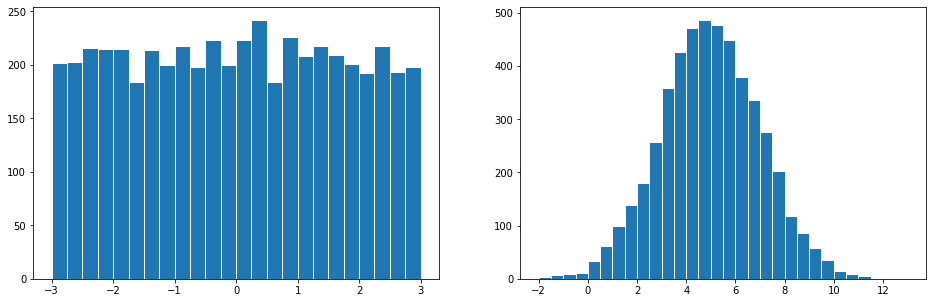

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
ax[0].hist(uniforms, bins=np.arange(-3, 3.1, 0.25), edgecolor='white')


# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
ax[1].hist(normals, bins=np.arange(-2, 13.1, 0.5), edgecolor='white')
plt.show()

Notice how the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

### ***Understanding random seeds***

While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

Which statement about x and y is true?

```
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
```
The values of x are different from those of y.

```
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
```

x and y have identical values

```
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
```

x and y differs

# ***Making systematic sampling safe*** แต่การทำเช่นนี้ ก็ทำ simple random sampling ไปเลยมันก็เหมือนกัน

In [ ]:
# Shuffle the rows
shuffled = coffee_ratings.sample(frac=1)

shuffled = shuffled.reset_index(drop=True).reset_index()
shuffled.plot(x="index", y="aftertaste", kind="scatter")

### ***Simple random sampling***

The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

* Sample 70 rows from `attrition_pop` using simple random sampling, setting the random seed to `18900217`.
* Print the sample dataset, `attrition_samp`. What do you notice about the indices?

In [11]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


Notice how ***the indexes in the sample aren't always in increasing order***. They are just random.

### ***Systematic sampling***

One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

* Set the sample size to `70`.
* Calculate the population size from `attrition_pop`.
* Calculate the interval between the rows to be sampled.
* Systematically sample `attrition_pop` to get the rows of the population at each interval, starting at `0`; assign the rows to `attrition_sys_samp`.

In [13]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = attrition_pop.shape[0]

# Calculate the interval
interval = pop_size//sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
attrition_sys_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


 Systematic sampling avoids randomness by picking rows at regular intervals.

 ### ***Is systematic sampling OK?***

Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

* Add an index column to `attrition_pop`, assigning the result to `attrition_pop_id`.
* Create a scatter plot of `YearsAtCompany` versus index for `attrition_pop_id`.

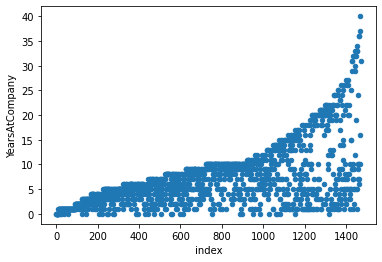

In [14]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

* Randomly shuffle the rows of `attrition_pop`.
* Reset the row indexes, and add an index column to `attrition_pop`.
* Repeat the scatter plot of `YearsAtCompany` versus `index`, this time using `attrition_shuffled`.

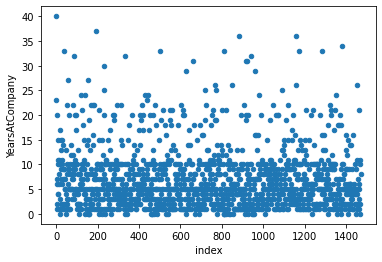

In [15]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

 Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

# ***Stratification Sampling***

Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.

In [16]:
import pandas as pd

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')

top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

# ***10 % Simple Random Sample***

In [17]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala", "Brazil", "Taiwan", "United States (Hawaii)"]
top_counted_subset = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[top_counted_subset]

coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)

coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

# ***Proportional stratified sampling***

ถ้าต้องการให้อัตราส่วนของตัวอย่างที่สุ่มมาใกล้เคียงกับอัตราส่วนจริงในประชากร ต้องทำการ groupby ก่อน

In [18]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin").sample(frac=0.1, random_state=2021)

coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: country_of_origin, dtype: float64

# ***Equal counts stratified sampling***

In [20]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin").sample(n=15, random_state=2021)
coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: country_of_origin, dtype: float64

# ***Weighted random sampling***

In [21]:
import numpy as np

coffee_ratings_weight = coffee_ratings_top
condition =   coffee_ratings_weight['country_of_origin'] == "Taiwan"

# ให้ความสำคัญกับกาแฟไต้หวันเป็นสองเท่าเมื่อเทียบกับกาแฟอื่นๆ
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Mexico                    0.375000
Colombia                  0.204545
Taiwan                    0.136364
Guatemala                 0.113636
Brazil                    0.102273
United States (Hawaii)    0.068182
Name: country_of_origin, dtype: float64

จะเห็นว่า จำนวนตัวอย่างของกาแฟไต้หวันเพิ่มขึ้นมาเป็นสองเท่าจากเดิม

### ***Proportional stratified sampling***

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

* Get the proportion of employees by Education level from `attrition_pop`.

In [22]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
education_counts_pop

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64

* Use proportional stratified sampling on `attrition_pop` to sample 40% of each Education group, setting the seed to `2022`.

In [23]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)

attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


Get the proportion of employees by Education level from `attrition_strat`.

In [24]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

### ***Equal counts stratified sampling***

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

* Use equal counts stratified sampling on `attrition_pop` to get `30` employees from each `Education` group, setting the seed to `2022`.

In [25]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n=30, random_state=2022)
attrition_eq

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,33,0.0,Travel_Rarely,922,Research_Development,1,Doctor,Medical,Low,Female,...,Excellent,High,1,10,2,Better,6,1,0,5
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,...,Excellent,Low,0,10,3,Better,10,7,1,4
530,32,0.0,Travel_Rarely,120,Research_Development,6,Doctor,Life_Sciences,High,Male,...,Outstanding,Low,0,8,2,Better,5,4,1,4
1049,48,0.0,Travel_Rarely,163,Sales,2,Doctor,Marketing,Medium,Female,...,Excellent,Low,1,14,2,Better,9,7,6,7


* Get the proportion of employees by Education level from `attrition_eq`.

In [26]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)
education_counts_eq

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64

If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.

### ***Weighted sampling***

Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.


* Plot `YearsAtCompany` from `attrition_pop` as a histogram with bins of width `1` from `0` to `40`.

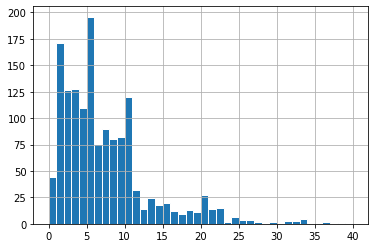

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attrition_pop = pd.read_feather('attrition.feather')

# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 40.5, 1), edgecolor='white')
plt.show()

* Sample 400 employees from `attrition_pop` weighted by `YearsAtCompany`.

In [29]:
attrition_weight = attrition_pop.sample(n=400, weights='YearsAtCompany')
attrition_weight

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
717,54,0.0,Travel_Rarely,157,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,Very_High,0,9,3,Better,5,2,1,4
741,29,0.0,Non-Travel,1496,Research_Development,1,Below_College,Technical_Degree,Very_High,Male,...,Excellent,Low,1,10,1,Better,10,7,0,9
482,25,1.0,Travel_Rarely,1219,Research_Development,4,Below_College,Technical_Degree,Very_High,Male,...,Excellent,Medium,1,7,3,Best,7,7,5,6
592,33,0.0,Travel_Frequently,1111,Sales,5,Below_College,Life_Sciences,Medium,Male,...,Excellent,Low,0,8,2,Best,5,4,1,2
798,36,0.0,Travel_Rarely,676,Research_Development,1,Bachelor,Other,High,Female,...,Excellent,Low,1,10,2,Better,9,7,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
797,34,0.0,Travel_Rarely,182,Research_Development,1,Master,Life_Sciences,Medium,Female,...,Excellent,High,0,10,2,Better,4,2,1,3
1243,50,0.0,Travel_Rarely,1207,Research_Development,28,Below_College,Medical,Very_High,Male,...,Excellent,High,3,20,3,Better,20,8,3,8
455,29,1.0,Travel_Rarely,992,Research_Development,1,Bachelor,Technical_Degree,High,Male,...,Excellent,Very_High,0,7,1,Good,6,2,1,5


* Plot `YearsAtCompany` from `attrition_weight` as a histogram with `bins` of width `1` from `0` to `40`.

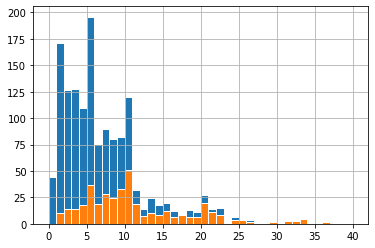

In [32]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1), edgecolor='white')

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 40.5, 1), edgecolor='white')
plt.show()

The weighted sample mean is around 11, which is higher than the population mean of around 7. The fact that the two numbers are different means that the weighted simple random sample is biased.

# ***Cluster sampling***

* Use simple random sampling to pick some subgroups
* Use simple random sampling on only those subgroups

## ***Stratified sampling***

* Split the population into subgroups
* Use simple random sampling on every subgroup

### ***The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.***

## ***Stage 1: sampling for subgroups***



In [3]:
import pandas as pd
import random

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')

varieties_pop = list(coffee_ratings['variety'].unique())
print(varieties_pop, end=" ")

varieties_samp = random.sample(varieties_pop, k=3)
print("\n")
print(varieties_samp)

# ทำให้เหมือนในสไลด์
varieties_samp = ['Hawaiian Kona', 'Bourbon', 'SL28']

[None, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe', 'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona', 'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica', 'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas', 'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms', 'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe', 'Pache Comun'] 

['Pacas', 'Pache Comun', 'Mandheling']


## ***Stage 2: sampling each group***

### จะทำไม่ได้ ถ้าเลือกกลุ่มมาแล้ว ประชากรน้อยกว่า 5 ก็จะเลือกไม่ได้

In [6]:
coffee_ratings_cluster = coffee_ratings[coffee_ratings['variety'].isin(varieties_samp)]

# Do we really need this line?  This line removes level with zero rows.
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].astype('category')
coffee_ratings_cluster['variety'] = coffee_ratings_cluster['variety'].cat.remove_unused_categories()

coffee_ratings_cluster.groupby("variety").sample(n=5, random_state=2021).reset_index().set_index("variety")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
variety,,,,,,,,,,,,,,,,,,,,,
Bourbon,575,82.83,Arabica,juan luis alvarado romero,Guatemala,agropecuaria quiagral,None,beneficio ixchel,11/23/0934,"unex guatemala, s.a.",...,Green,10.0,"July 9th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
Bourbon,560,82.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0513,beneficio ixchel,11/23/0513,"unex guatemala, s.a.",...,Green,2.0,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
Bourbon,524,83.00,Arabica,juan luis alvarado romero,Guatemala,la igualdad,None,beneficio la igualdad,11/194/07,"nuevos mercados, s.a.",...,Green,2.0,"April 27th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60
Bourbon,1140,79.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0639,beneficio ixchel,11/23/0639,"unex guatemala, s.a.",...,Green,2.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
Bourbon,318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.00,934.00,934.00
Hawaiian Kona,308,83.75,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,K#13150104,kona pacific farmers cooperative,...,Bluish-Green,0.0,"May 2nd, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
Hawaiian Kona,851,81.83,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,KF315210,kona pacific farmers cooperative,...,Bluish-Green,1.0,"March 6th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
Hawaiian Kona,405,83.33,Arabica,eileen koyanagi,United States (Hawaii),None,None,None,KP012314,kona pacific farmers cooperative,...,Bluish-Green,1.0,"February 25th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
Hawaiian Kona,176,84.42,Arabica,kona pacific farmers cooperative,United States (Hawaii),None,None,None,2234501 KONA FANCY,kona pacific farmers cooperative,...,Blue-Green,1.0,"January 21st, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN


### ***Cluster sampling***

Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the `JobRole` column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.

A seed of 19790801 has also been set with `random.seed()`.

* Create a list of unique `JobRole` values from `attrition_pop`, and assign to `job_roles_pop`.
* Randomly sample four `JobRole` values from `job_roles_pop`.
* Subset `attrition_pop` for the sampled job roles by filtering for rows where `JobRole` is in `job_roles_samp`.
* Remove any unused categories from `JobRole`.
* For each job role in the filtered dataset, take a random sample of ten rows, setting the seed to `2022`.

In [2]:
import pandas as pd
import random
import numpy as np

random.seed(19790801)

attrition_pop = pd.read_feather('attrition.feather')

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

display(attrition_filtered.head())
print(attrition_filtered.shape[0])

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
print(attrition_filtered.shape[0])

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)


# Print the sample
display(attrition_clust.head())

['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
10,18,0.0,Non-Travel,1431,Research_Development,14,Bachelor,Medical,Medium,Female,...,Excellent,High,0,0,4,Bad,0,0,0,0
17,31,0.0,Travel_Rarely,1082,Research_Development,1,Master,Medical,High,Male,...,Excellent,Medium,0,1,4,Better,1,1,1,0


526
526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2


# ***Review of sampling techniques - setup***



In [1]:
import pandas as pd

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')
print(coffee_ratings['country_of_origin'].value_counts().head(6))

top_counted_countries = ["Mexico", "Colombia", "Guatemala", "Brazil", "Taiwan", "United States (Hawaii)"]
subset_condition = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[subset_condition]
coffee_ratings_top.shape

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64


(880, 43)

# ***Review of simple random sampling***

In [2]:
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)
print(coffee_ratings_srs['country_of_origin'].value_counts(normalize=True))
coffee_ratings_srs.shape

Mexico                    0.273038
Colombia                  0.235495
Guatemala                 0.163823
Brazil                    0.163823
United States (Hawaii)    0.085324
Taiwan                    0.078498
Name: country_of_origin, dtype: float64


(293, 43)

# ***Review of stratified sampling***

In [3]:
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin").sample(frac=1/3, random_state=2021)
print(coffee_ratings_strat['country_of_origin'].value_counts(normalize=True))
coffee_ratings_strat.shape

Mexico                    0.269625
Colombia                  0.208191
Guatemala                 0.204778
Brazil                    0.150171
Taiwan                    0.085324
United States (Hawaii)    0.081911
Name: country_of_origin, dtype: float64


(293, 43)

# ***Review of cluster sampling***

In [16]:
import random

# สุ่มเลือกกลุ่ม
top_countries_samp = random.sample(top_counted_countries, k=2)

# กรองตัวอย่างตามกลุ่มที่สุ่มเลือกมา
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)
coffee_ratings_cluster = coffee_ratings_top[top_condition]
coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].astype('category')
coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].cat.remove_unused_categories()

# สุ่มเลือกตัวอย่างจากกลุ่มที่เลือกมา ==> ทำไม่ได้ เพราะว่า n มีจำนวนมากกว่าประชากร
# ถ้าไม่ได้สุ่มเจอกลุ่มที่มีขนาดใหญ่ จะ error
coffee_ratings_clust = coffee_ratings_cluster.groupby("country_of_origin").sample(n=len(coffee_ratings_top) // 6)
coffee_ratings_clust.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(292, 43)

### ***3 kinds of sampling***

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's relationship with the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`. 


* Perform simple random sampling on `attrition_pop` to get one-quarter of the population, setting the seed to `2022`.

* Perform stratified sampling on `attrition_pop` to sample one-quarter of each `RelationshipSatisfaction` group, setting the seed to `2022`.

* Create a list of unique values from `attrition_pop`'s `RelationshipSatisfaction` column.

* Randomly sample `satisfaction_unique` to get two values.

* Subset the population for rows where `RelationshipSatisfaction` is in `satisfaction_samp` and clear any unused categories from `RelationshipSatisfaction`; assign to `attrition_clust_prep`.

* Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the population and setting the seed to `2022`.

In [29]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=1/4, random_state=2022)

# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=1/4, random_state=2022)

# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n=len(attrition_pop)//4, random_state=2022)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
attrition_clust['RelationshipSatisfaction'].value_counts()

High         367
Very_High    367
Name: RelationshipSatisfaction, dtype: int64

### ***Comparing point estimates***

Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an Attrition value of 1) for each value of `RelationshipSatisfaction`.

`attrition_pop`, `attrition_srs`, `attrition_strat`, and `attrition_clust` are available.


* Group `attrition_pop` by `RelationshipSatisfaction` levels and calculate the mean of Attrition for each level.

* Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the simple random sample, `attrition_srs`.

* Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the stratified sample, `attrition_strat`.

* Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, `attrition_clust`.

In [32]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64
RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample.

### ***Calculating relative errors***

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is ***relative error***. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

`attrition_pop` and `mean_attrition_pop` (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as `pd`.

* Generate a simple random sample from `attrition_pop` of fifty rows, setting the seed to `2022`.

* Calculate the mean employee Attrition in the sample.

* Calculate the relative error between `mean_attrition_srs50` and `mean_attrition_pop` as a percentage.

* Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of `attrition_pop`.

In [1]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')
mean_attrition_pop = attrition_pop['Attrition'].mean()

# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_srs50 - mean_attrition_pop) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)
# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_srs100 - mean_attrition_pop) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

62.78481012658227
6.962025316455695


As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

As you increase the sample size, the relative error decreases quickly at first, then more slowly as it drops to zero.

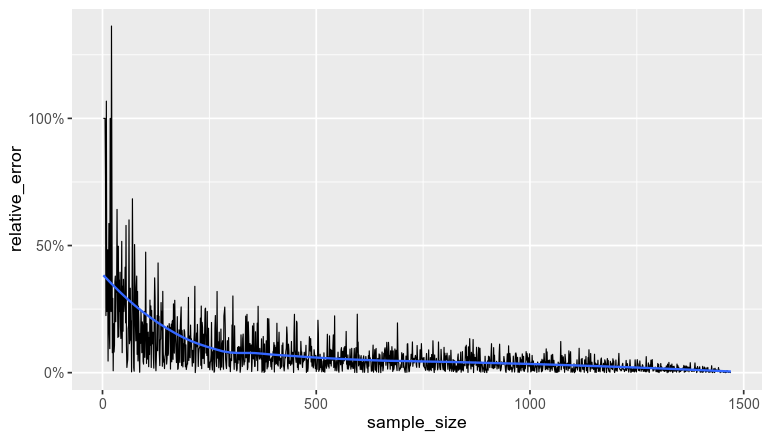

# ***Mean of means***



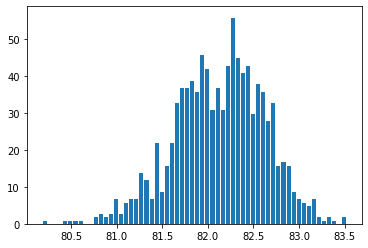

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')

mean_cup_points_1000 = []

for i in range(1000):
    mean_cup_points_1000.append(coffee_ratings.sample(n=30)['total_cup_points'].mean())

plt.hist(mean_cup_points_1000, bins=60, edgecolor='white')
plt.show()

### ***Replicating samples***

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

* Replicate the provided code so that it runs `500` times. Assign the resulting list of sample means to `mean_attritions`.
* Draw a histogram of the `mean_attritions` list with `16` bins.

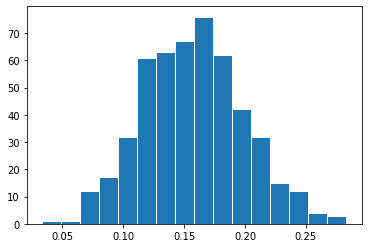

In [19]:
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(attrition_pop.sample(n=60)['Attrition'].mean())

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16, edgecolor='white')
plt.show()

By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.  As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

### ***Exact sampling distribution***

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the ***sampling distribution***. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

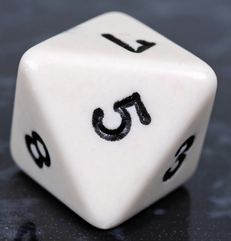

`pandas`, `numpy`, and `matplotlib.pyplot` are loaded with their usual aliases. The `expand_grid()` function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the `expand_grid()` function is provided in the [pandas documentation](https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data).

* Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.

* Add a column, `mean_roll`, to dice, that contains the mean of the five rolls as a `categorical`.



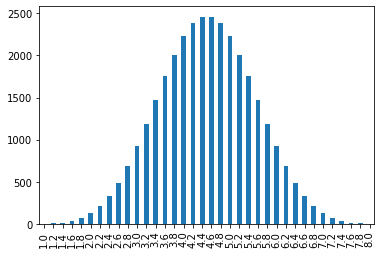

In [2]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

The exact sampling distribution shows all possible variations of the point estimate that you are interested in.

### ***Approximate sampling distribution***

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

* Sample one to eight, five times, with replacement. Assign to `five_rolls`.
* Calculate the mean of `five_rolls`.

* Replicate the sampling code 1000 times, assigning each result to the list `sample_means_1000`.

* Plot `sample_means_1000` as a histogram with 20 `bins`.

4.8
[4.0, 5.4, 4.6, 5.8, 5.0, 4.2, 4.4, 3.4, 2.6, 5.2]


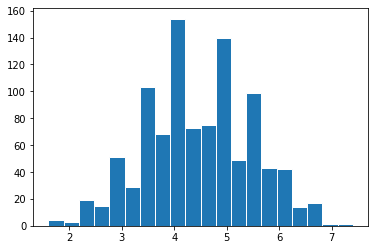

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())


# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(np.random.choice(list(range(1, 9)), size=5, replace=True).mean())
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20, edgecolor='white')
plt.show()

Once your dataset gets sufficiently big, <ins>***exact sampling distributions cannot be calculated***</ins>, so an approximate sampling distribution must be used. Notice that the histogram is close to but <ins>***not exactly the same***</ins> as the shape of the bar graph from the previous exercise.

The <ins>***exact sampling distribution***</ins> can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the <ins>***approximate sampling distribution***</ins> must be used.

### ***Population & sampling distribution means***

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1,000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` are available; numpy as `np` is loaded.

* Calculate the mean of `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` (a mean of sample means).

In [11]:
import numpy as np
import pandas as pd

attrition_pop = pd.read_feather('attrition.feather')

sampling_distribution_5, sampling_distribution_50, sampling_distribution_500 = [], [], []
s = [sampling_distribution_5, sampling_distribution_50,  sampling_distribution_500]
for i, j in zip(s, [5, 50, 500]):
    for k in range(1000):
        i.append(attrition_pop['Attrition'].sample(n=j).mean())

# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(attrition_pop['Attrition'].mean())
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.16122448979591836
0.1554
0.16258
0.16189599999999998


Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

### ***Population & sampling distribution variation***

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` are available.

* Calculate the standard deviation of `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` (a standard deviation of sample means).

In [15]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5, attrition_pop['Attrition'].std(ddof=0)/np.sqrt(5))
print(sd_of_means_50, attrition_pop['Attrition'].std(ddof=0)/np.sqrt(50))
print(sd_of_means_500, attrition_pop['Attrition'].std(ddof=0)/np.sqrt(500))

0.15948754269934776 0.16445738273848717
0.053025987547195716 0.052005990748367883
0.013435538608395931 0.01644573827384872


The standard deviation of the sampling distribution is approximately equal to the <ins>***population standard deviation divided by the square root of the sample size***</ins>.

The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

# ***Sampling with Replacement***

## ***Coffee data preparation***

In [16]:
import pandas as pd

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')

coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


## ***Sample with replacement***

* Setting `frac=1` produces a sample of thee same size as the original dataset
* สังเกตจาก index จะเห็นว่ามีบางตัวอย่างถูกสุ่มเรียกซ้ำ เช่น ตัวอย่างที่ 278 ถูกเรียกซ้ำ 5 ครั้ง

In [17]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp["index"].value_counts()

278     5
166     5
361     5
1280    5
1292    5
       ..
789     1
791     1
947     1
463     1
1219    1
Name: index, Length: 846, dtype: int64

ถ้ามีการเรียกซ้ำ แสดงว่า ค่าตัวอย่างบางตัวต้องไม่โผล่มาในการ resample แน่ๆ

# ***Bootstrapping***

The opposite of sampling from a population

* ***Treat the dataset as a sample and build up a theoretical
population from the sample.***

## ***Principles of bootstrapping***

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

## ***Bootstrap Steps***

1. Make a resample (with replacement) of the same size as the original sample
2. Calculate the statistic of interest for this bootstrap sample
3. Repeat steps 1 and 2 many times

The resulting statistics are bootstrap statistics, and they form a **"bootstrap distribution"**.

### ***Bootstrapping coffee mean flavor***

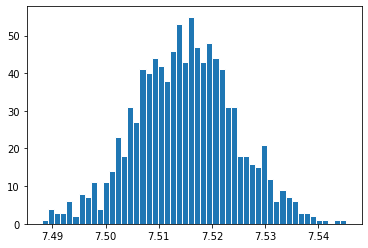

In [20]:
import numpy as np
import matplotlib.pyplot as plt

mean_flavors_1000 = []

# ต่างกันแค่ replace=True
for i in range(1000):
    mean_flavors_1000.append(np.mean(coffee_resamp.sample(frac=1, replace=True)['flavor']))


plt.hist(mean_flavors_1000, edgecolor='white', bins=50)
plt.show()

 The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

### ***Generating a bootstrap distribution***

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a 
* sampling distribution, 
* you start with the population and sample ***without replacement***. 

To make a 
* bootstrap distribution, 
* you start with a sample and sample that ***with replacement***. 

After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, `spotify_sample` is a subset of the `spotify_population` dataset. To make it easier to see how resampling works, a row index column called `'index'` has been added, and only the artist name, song name, and danceability columns have been included.

* Generate a single bootstrap resample from `spotify_sample`.

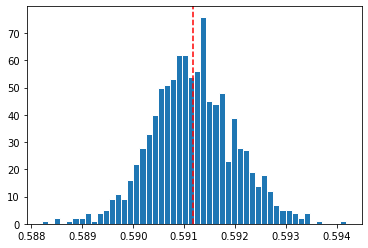

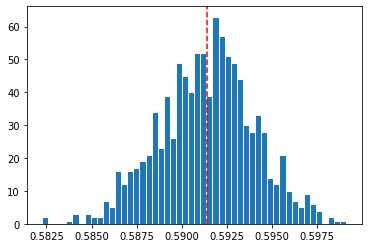

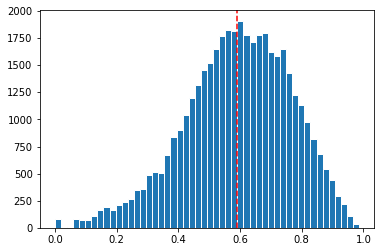

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spotify_sample = pd.read_feather('spotify_2000_2020.feather').reset_index()[['artists', 'name', 'danceability']]

# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability']))
 
mean_danceability_samp = []
for i in range(1000):
	mean_danceability_samp.append(
        np.mean(spotify_sample.sample(frac=0.1, replace=False)['danceability']))

# Draw a histogram of the resample means from bootstrap distribution
plt.hist(mean_danceability_1000, bins=50, edgecolor='white')
plt.axvline(x=np.mean(mean_danceability_1000), color='red', linestyle='--')
plt.show()

# Draw a histogram of the sampling distribution
plt.hist(mean_danceability_samp, bins=50, edgecolor='white')
plt.axvline(x=np.mean(mean_danceability_samp), color='red', linestyle='--')
plt.show()

# population histogram
plt.hist(spotify_sample['danceability'], bins=50, edgecolor='white')
plt.axvline(x=spotify_sample['danceability'].mean(), color='red', linestyle='--')
plt.show()

From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

จะเห็นว่า ค่าเฉลี่ยใกล้ๆกัน แต่การกระจายตัวของข้อมูลของ bootstrap  และ sampling distribution น้อยกว่า population distribution

# ***Bootstrap Distribution from 500 samples from coffee dataset***

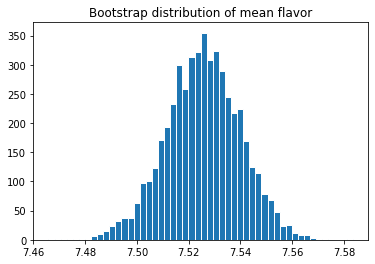

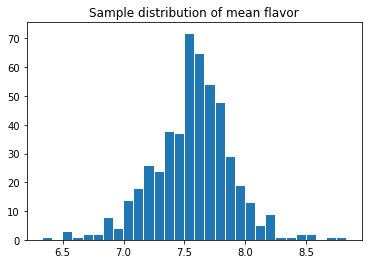

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coffee_ratings = pd.read_feather('coffee_ratings_full.feather')

coffee_sample = coffee_ratings[["variety", "country_of_origin", "flavor"]].reset_index().sample(n=500)

mean_flavors_5000 = []
for i in range(5000):
    mean_flavors_5000.append(np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))

bootstrap_distn = mean_flavors_5000
plt.hist(bootstrap_distn, bins=50, edgecolor='white')
plt.title('Bootstrap distribution of mean flavor')
plt.show()

plt.hist(coffee_sample['flavor'], bins=30, edgecolor='white')
plt.title('Sample distribution of mean flavor')
plt.show()

The bootstrap distribution looks like a normal distribution.

### ***จะเห็นว่า การกระจายของข้อมูล ใน bootstrap น้อยกว่า แสดงให้เห็นถึง standard deviation ที่่น้อยกว่า***

# ***Sample, bootstrap distribution, population means***

* Sample mean

In [5]:
coffee_sample['flavor'].mean()

7.515779999999999

* "*Estimated*" population mean:
  * The bootstrap sample mean is usuallly almost identical to the original sample mean.

In [6]:
np.mean(bootstrap_distn)

7.515499008

* ***True*** population mean:
  * The true popluation mean is actually a little different.

In [7]:
coffee_ratings['flavor'].mean()

7.526046337817636

ก็คือ ถ้ากลุ่มตัวอย่างที่สุ่มมา มันห่างไกลความเป็นจริงไปจากประชากรมากๆ การใช้ bootstrap ก็ไม่ได้ช่วยให้การประมาณค่าทางสถิติต่างๆมันเข้าใกล้ประากรมากขึ้นเลย

# ***Sample standard deviation***

In [8]:
coffee_sample['flavor'].std()

0.33350929296946746

# ***Bootstrap standard deviation***

In [9]:
# Standard error
np.std(bootstrap_distn, ddof=1)

0.014861995281814791

Standard error = $\dfrac{\text{Sample Standard Deviation}}{\sqrt{\text{# Sample size}}}$

In [13]:
# ในที่นี้คือสุ่มมา 500
coffee_sample['flavor'].std()/np.sqrt(500)

0.01460779913577617

Estimated standard error → standard deviation of the bootstrap distribution for a sample statistic ในที่นี้คือ sd ของ mean ถึงแม้ว่า bootstrap จะประมาณค่าทางสถิติได้ไม่ดีนัก เพราะขึ้นกับว่ากลุ่มตัวอย่างที่สุ่มมาสอดคล้องกับประชากรหรือไม่ แต่เราสามารถใช้

Population std. dev ≈ Std. Error $\times \sqrt{\text{# Sample size}}$

เพื่อประมาณ ส่วนเบี่ยงเบนมาตรฐานของประชากรได้

### ***Sampling distribution vs. bootstrap distribution***

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

`spotify_population` (the whole dataset) and `spotify_sample` (500 randomly sampled rows from `spotify_population`) are available.


1. Generate a sampling distribution of 2,000 replicates.
  * Sample 500 rows of the <ins>***population***</ins> without replacement and calculate the mean popularity.

2. Generate a bootstrap distribution of 2,000 replicates.
  * Sample 500 rows of the <ins>***sample***</ins> with replacement and calculate the mean popularity.

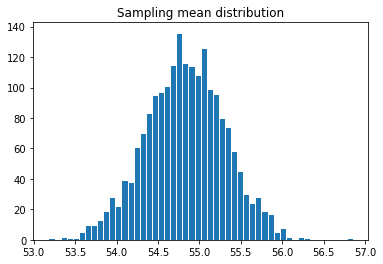

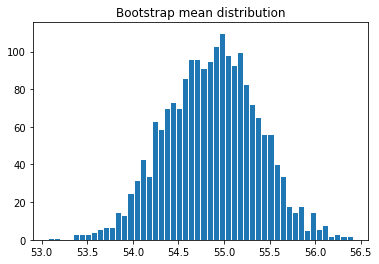

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spotify_population = pd.read_feather('spotify_2000_2020.feather').reset_index()
spotify_sample = spotify_population.sample(n=500)

mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population.sample(n=500)['popularity']))

mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n=500, replace=True)['popularity']))

plt.hist(mean_popularity_2000_samp, bins=50, edgecolor='white')
plt.title('Sampling mean distribution')
plt.show()

plt.hist(mean_popularity_2000_boot, bins=50, edgecolor='white')
plt.title('Bootstrap mean distribution')
plt.show()

The sampling distribution and bootstrap distribution are closely related, and so is the code to generate them.

### ***Compare sampling and bootstrap means***

To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5,000.

* Calculate the mean popularity in 4 ways:

  * Population: from `spotify_population`, take the mean of popularity.
  * Sample: from `spotify_sample`, take the mean of popularity.
  * Sampling distribution: from `sampling_distribution`, take its mean.
  * Bootstrap distribution: from `bootstrap_distribution`, take its mean.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spotify_population = pd.read_feather('spotify_2000_2020.feather').reset_index()
spotify_sample = spotify_population.sample(n=5000)

sampling_distribution = []

# Generate a sampling distribution of 5000 replicates
for i in range(5000):
    sampling_distribution.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population.sample(n=5000)['popularity']))

bootstrap_distribution = []

# Generate a bootstrap distribution of 5000 replicates
for i in range(5000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n=5000, replace=True)['popularity']))
#############################################################################

# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.7392, 54.83864856, 54.73390896000001]


The sampling distribution mean, 54.83864856,  is the best estimate of the true population mean, 54.837142308430955; the bootstrap distribution mean, 54.73390896000001, is closest to the original sample mean, 54.7392.

The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

### ***Compare sampling and bootstrap standard deviations***

In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Recall that the sample size is 5000.

* Calculate the standard deviation of popularity in 4 ways.

  * Population: from `spotify_population`, take the standard deviation of `popularity`.
  * Original sample: from `spotify_sample`, take the standard deviation of `popularity`.
  * Sampling distribution: from `sampling_distribution`, take its standard deviation and multiply by the square root of the sample size (`5000`).
  * Bootstrap distribution: from `bootstrap_distribution`, take its standard deviation and multiply by the square root of the sample size.

In [19]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1)*np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1)*np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257204, 11.008097883095074, 10.152859486902404, 11.024317520552044]


ผลลัพธ์ไม่ใกล้กับในตัวอย่างเท่าไหร่ เอาเป็นว่า พอใช้ standard error ของ bootstrap distribution มาประมาณค่าของ standard deviation ของ population ได้ละกัน

# ***Confidence Interval***

## ***Bootstrap distribution of mean flavor***

### ***Mean of resamples***

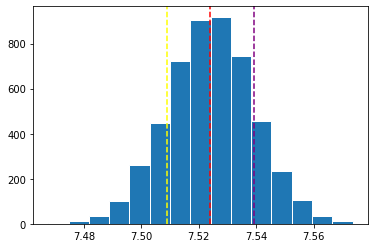

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

coffee_pop = pd.read_feather('coffee_ratings_full.feather')
coffee_samp = coffee_pop.sample(frac=1, replace=True)
coffee_boot_distn = []
for i in range(5000):
    coffee_boot_distn.append(np.mean(coffee_samp.sample(n=500, replace=True)['flavor']))

plt.hist(coffee_boot_distn, bins=15, edgecolor='white')
plt.axvline(x=np.mean(coffee_boot_distn), linestyle='--', color='red')
plt.axvline(x=np.mean(coffee_boot_distn) - np.std(coffee_boot_distn, ddof=1), linestyle='--', color='yellow')
plt.axvline(x=np.mean(coffee_boot_distn) + np.std(coffee_boot_distn, ddof=1), linestyle='--', color='purple')
plt.show()

# ***Quantile method for confidence intervals***

## ***95% Confidence Interval***

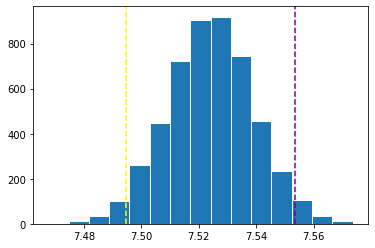

In [8]:
plt.hist(coffee_boot_distn, bins=15, edgecolor='white')
plt.axvline(x=np.quantile(coffee_boot_distn, 0.025), linestyle='--', color='yellow')
plt.axvline(x=np.quantile(coffee_boot_distn, 0.975), linestyle='--', color='purple')
plt.show()

# ***Inverse cumulative distribution function***

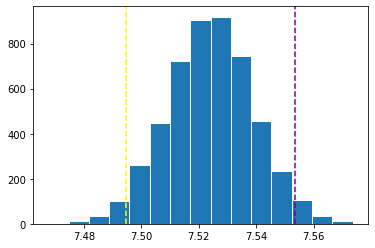

In [13]:
from scipy.stats import norm
lower = norm.ppf(0.025, loc=np.mean(coffee_boot_distn), scale=np.std(coffee_boot_distn, ddof=1))
upper = norm.ppf(0.975, loc=np.mean(coffee_boot_distn), scale=np.std(coffee_boot_distn, ddof=1))
plt.hist(coffee_boot_distn, bins=15, edgecolor='white')
plt.axvline(x=lower, linestyle='--', color='yellow')
plt.axvline(x=upper, linestyle='--', color='purple')
plt.show()

### ***Calculating confidence intervals***

You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

`spotify_population`, `spotify_sample`, and `bootstrap_distribution` are available; `pandas` and `numpy` are loaded with their usual aliases, and `norm` has been loaded from `scipy.stats`.

1. Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the `0.025` quantile as `lower_quant` and the `0.975` quantile as `upper_quant`.

2. Generate a 95% confidence interval using the standard error method from the bootstrap distribution.

* Calculate `point_estimate` as the mean of `bootstrap_distribution`, and `standard_error` as the standard deviation of `bootstrap_distribution`.
* Calculate `lower_se` as the `0.025` quantile of an inv. CDF from a normal distribution with mean `point_estimate` and standard deviation `standard_error`.
* Calculate `upper_se` as the `0.975` quantile of that same inv. CDF.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

spotify_population = pd.read_feather('spotify_2000_2020.feather').reset_index()
spotify_sample = spotify_population.sample(n=500)


bootstrap_distribution = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(n=500, replace=True)['popularity']))
    
###############################################################################

# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.119949999999996, 55.978)
(54.17025869626163, 56.02318330373838)


The standard error method for calculating the confidence interval ***assumes that the bootstrap distribution is normal***. This assumption should hold if the sample size and number of replicates are sufficiently large.